In [ ]:
# # Mount
# from google.colab import drive
# drive.mount('/content/gdrive')

In [ ]:
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

In [ ]:
# Import Library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
from sklearn.cluster import KMeans
import plotly.express as px
import plotly.graph_objs as go
%matplotlib inline

plt.rc('font', family='NanumBarunGothic') 

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
all =  pd.read_csv('./gdrive/My Drive/빅콘 대상팀/data/all_clean.csv',parse_dates=['STD_YMD'])
dong = pd.read_excel('./gdrive/My Drive/빅콘 대상팀/data/지역데이터/구_동.xlsx')

In [ ]:
all = pd.merge(dong,all,on='HDONG_NM',how='left')
all['year']=pd.DatetimeIndex(all.STD_YMD).year
gs_list = ['GS_식사', 'GS_간식', 'GS_마실거리', 'GS_홈/리빙', 'GS_헬스/뷰티', 'GS_취미/여가활동','GS_사회활동', 'GS_임신육아']
for i in gs_list:
  all.loc[:,i] = all.loc[:,i].str.strip('%').astype(float) 
all.head()

,HDONG_GU_x,HDONG_NM,STD_YMD,CJ_가구/인테리어,CJ_도서/음반,CJ_디지털/가전,CJ_생활건강,CJ_스포츠/레저,CJ_식품,CJ_출산/육아,CJ_패션의류,CJ_패션잡화,CJ_화장품/미용,SC_CNT_가구,SC_CNT_가전,SC_CNT_광학제품,SC_CNT_레저업소,SC_CNT_레저용품,SC_CNT_문화취미,SC_CNT_보건위생,SC_CNT_사무통신,SC_CNT_서적문구,SC_CNT_수리서비스,SC_CNT_숙박,SC_CNT_신변잡화,SC_CNT_연료판매,SC_CNT_요식업소,SC_CNT_유통업,SC_CNT_음료식품,SC_CNT_의료기관,SC_CNT_의복,SC_CNT_자동차정비,SC_CNT_자동차판매,SC_CNT_전기,SC_CNT_주방용구,SC_CNT_직물,SC_AMT_가구,SC_AMT_가전,SC_AMT_광학제품,SC_AMT_레저업소,SC_AMT_레저용품,SC_AMT_문화취미,SC_AMT_보건위생,SC_AMT_사무통신,SC_AMT_서적문구,SC_AMT_수리서비스,SC_AMT_숙박,SC_AMT_신변잡화,SC_AMT_연료판매,SC_AMT_요식업소,SC_AMT_유통업,SC_AMT_음료식품,SC_AMT_의료기관,SC_AMT_의복,SC_AMT_자동차정비,SC_AMT_자동차판매,SC_AMT_전기,SC_AMT_주방용구,SC_AMT_직물,GS_매출지수,GS_식사,GS_간식,GS_마실거리,GS_홈/리빙,GS_헬스/뷰티,GS_취미/여가활동,GS_사회활동,GS_임신육아,TMST_MORNING,TMST_NOON,TMST_AFTNOON,TMST_NIGHT,TMST_DAWN,HDONG_GU_y,year
0,서울 중구,소공동,2019-02-01,3.0,48.0,35.0,15.0,0.0,19.0,0.0,25.0,10.0,26.0,0.0,0.0,29.0,400.0,30.0,537.0,558.0,72007.0,379.0,54.0,960.0,48.0,566.0,184667.0,61985.0,1969.0,3316.0,142.0,6409.0,0.0,0.0,5.0,0.0,0.0,0.0,966.0,20710.0,8766.0,7935.0,31642.0,514292.0,7774.0,1495.0,115004.0,51541.0,46888.0,1781639.0,2300513.0,69906.0,302176.0,14825.0,111690.0,0.0,0.0,276.0,0.0,1.67,28.8,18.6,38.4,4.2,8.1,0.4,1.1,0.5,12642.905,12738.570000,12449.9950,8822.2900,3058.72000,서울 중구,2019
1,서울 중구,소공동,2019-02-02,0.0,0.0,1.0,1.0,0.0,1.0,0.0,7.0,2.0,4.0,9.0,14.0,10.0,362.0,31.0,671.0,462.0,76121.0,190.0,10.0,951.0,43.0,664.0,180354.0,46348.0,1120.0,1567.0,62.0,4747.0,0.0,0.0,5.0,0.0,73.0,1315.0,10577.0,31561.0,3332.0,9703.0,52758.0,545929.0,8448.0,698.0,146840.0,2707.0,52570.0,1547756.0,2419649.0,27688.0,169084.0,2710.0,61529.0,0.0,0.0,19476.0,0.0,1.12,30.4,22.7,34.5,2.8,8.4,0.3,0.7,0.3,10389.105,10386.433333,9651.0275,5418.2975,1726.30875,서울 중구,2019
2,서울 중구,소공동,2019-02-03,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,296.0,35.0,615.0,240.0,71932.0,80.0,5.0,991.0,30.0,409.0,156443.0,40465.0,595.0,126.0,33.0,3503.0,0.0,0.0,5.0,5.0,0.0,0.0,0.0,3375.0,5809.0,8460.0,17728.0,516949.0,2631.0,294.0,188649.0,4339.0,29109.0,1344100.0,1757553.0,14840.0,5200.0,1084.0,16644.0,0.0,0.0,50.0,303.0,1.21,27.6,22.5,27.2,1.7,18.8,0.3,1.6,0.4,6856.020,6868.980000,6667.7975,3626.0300,1126.14875,서울 중구,2019
3,서울 중구,소공동,2019-02-04,1.0,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,268.0,10.0,417.0,94.0,66722.0,0.0,5.0,996.0,25.0,431.0,168320.0,28601.0,550.0,73.0,15.0,2932.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3397.0,140.0,8113.0,6222.0,480592.0,0.0,45.0,185323.0,136.0,28893.0,1456998.0,665997.0,11639.0,9695.0,1099.0,12806.0,0.0,0.0,0.0,0.0,1.03,35.6,23.8,30.8,1.5,5.7,0.6,1.8,0.2,7007.565,7067.386667,6293.0050,3545.3475,997.19500,서울 중구,2019
4,서울 중구,소공동,2019-02-05,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,204.0,5.0,451.0,56.0,49643.0,0.0,0.0,883.0,24.0,300.0,171658.0,27600.0,147.0,24.0,0.0,2828.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2296.0,23.0,6841.0,4439.0,367751.0,0.0,0.0,172738.0,972.0,13229.0,1582613.0,647557.0,1416.0,1007.0,0.0,10121.0,0.0,0.0,0.0,0.0,1.11,31.8,26.9,31.9,1.6,6.2,0.3,1.2,0.1,10025.750,9814.820000,9844.3150,4321.9550,1085.58625,서울 중구,2019


In [ ]:
all_seoul = all.query('HDONG_GU_x in ["서울 중구","서울 노원구"]')
gs_col = ['GS_매출지수','GS_식사', 'GS_간식', 'GS_마실거리', 'GS_홈/리빙', 'GS_헬스/뷰티', 'GS_취미/여가활동', 'GS_사회활동', 'GS_임신육아']
gs = all_seoul.groupby(['HDONG_NM','year']).mean().loc[:,gs_col].unstack().reset_index(drop=False).dropna()#상계 8동 na
gs_g = pd.DataFrame(gs.HDONG_NM)
for i in gs_col:
  gs_g[i] = (gs[(i,2020)] - gs[(i,2019)])*100
gs[('GS_매출지수','growth')] = gs_g['GS_매출지수']
gs_g.head()

,HDONG_NM,GS_매출지수,GS_식사,GS_간식,GS_마실거리,GS_홈/리빙,GS_헬스/뷰티,GS_취미/여가활동,GS_사회활동,GS_임신육아
0,공릉1동,-9.957025,18.048898,78.491736,-272.768595,39.022039,150.714876,-13.498623,-15.601928,16.340220
1,공릉2동,-3.426240,-43.241736,157.990358,-149.466942,23.496556,47.454545,-16.677686,-27.506887,8.117769
2,광희동,-90.104452,182.052920,-274.914925,9.197166,59.495104,120.659074,-8.605459,-83.048128,-4.416973
3,다산동,-26.769421,37.324380,14.057851,-236.319559,47.041322,154.607438,-18.800964,-13.815427,16.646694
4,동화동,8.153033,-402.017089,236.327217,21.757949,55.051128,82.632722,-19.761871,-15.710183,42.461829


In [ ]:
gs = gs.sort_values(by=('GS_매출지수','growth'),ascending=False)
gs.loc[:,['HDONG_NM','GS_매출지수']].head()

HDONG_NM   GS_매출지수                     
year               2019      2020     growth
9      상계3.4동  0.952917  1.124959  17.204201
23       중계1동  0.859833  0.953306   9.347245
17        약수동  1.237563  1.327107   8.954441
4         동화동  0.691610  0.773140   8.153033
10       상계5동  0.856833  0.902149   4.531543

# **1. 동별 매출지수 증감률 비교**

In [ ]:
top5 = gs.sort_values(by=('GS_매출지수','growth'),ascending=False).iloc[:5,:].HDONG_NM.tolist()
bott10 = gs.sort_values(by=('GS_매출지수','growth'),ascending=True).iloc[:10,:].HDONG_NM.tolist()
print('top 5:    ',top5)
print('bottom 5: ', bott10)

top 5:     ['상계3.4동', '중계1동', '약수동', '동화동', '상계5동']
bottom 5:  ['광희동', '을지로동', '소공동', '명동', '회현동', '필동', '하계1동', '장충동', '다산동', '월계1동']


/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 8722 missing from current font.

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning:

Glyph 8722 missing from current font.



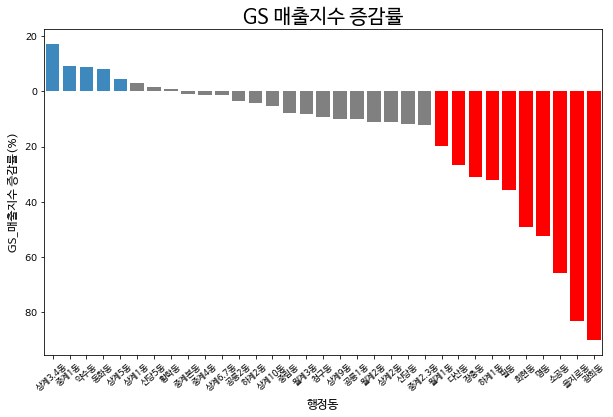

In [ ]:
def gr_plot(data,title,color_list):
  plt.figure(figsize = (10,6))
  plt.bar(data.HDONG_NM, data[('GS_매출지수','growth')], color = color_list,width=0.8)
  plt.xlabel('행정동',size=12)
  plt.ylabel('GS_매출지수 증감률(%)',size=12)
  plt.xticks(rotation=40,fontsize=9)
  plt.xlim(-0.5,32.5)
  plt.title(title,fontsize=20)
  plt.show()

all_color = ['#3d89be']*5+['grey']*18+['r']*10
gr_plot(gs,'GS 매출지수 증감률',all_color)

In [ ]:
gs_top = gs.sort_values(by=('GS_매출지수','growth'),ascending=False).iloc[:5,:].loc[:,['HDONG_NM','GS_매출지수']]
gs_bottom = gs.sort_values(by=('GS_매출지수','growth'),ascending=True).iloc[:10,:].loc[:,['HDONG_NM','GS_매출지수']].sort_values(by=('GS_매출지수','growth'),ascending=False)
gs_tb = pd.concat([gs_top,gs_bottom])

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 8722 missing from current font.

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning:

Glyph 8722 missing from current font.



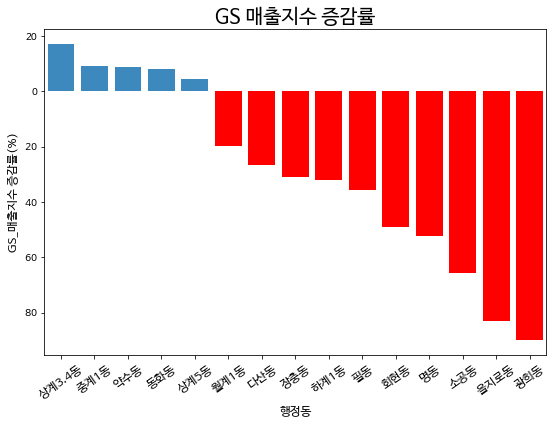

In [ ]:
def gr_plot(data,title,color_list):
  plt.figure(figsize = (9,6))
  plt.bar(data.HDONG_NM, data[('GS_매출지수','growth')], color = color_list,width=0.8)
  plt.xlabel('행정동',size=12)
  plt.ylabel('GS_매출지수 증감률(%)',size=12)
  plt.xticks(rotation=35,fontsize=12)
  plt.xlim(-0.5,14.5)
  plt.title(title,fontsize=20)
  plt.show()

tb_color = ['#3d89be']*5+['r']*10
gr_plot(gs_tb,'GS 매출지수 증감률',tb_color)

# **2. GS25 카테고리별 판매지수 증감률**


In [ ]:
all_a =  pd.read_csv('./gdrive/My Drive/빅콘 대상팀/data/all_amt.csv',parse_dates=['STD_YMD'])
dong = pd.read_excel('./gdrive/My Drive/빅콘 대상팀/data/지역데이터/구_동.xlsx')

In [ ]:
all_a = pd.merge(dong,all_a,on='HDONG_NM',how='left')
all_a['year']=pd.DatetimeIndex(all_a.STD_YMD).year
all_a_seoul = all_a.query('HDONG_GU in ["서울 중구","서울 노원구"]')
gs_a_col = ['GS_식사', 'GS_간식', 'GS_마실거리', 'GS_홈/리빙', 'GS_헬스/뷰티', 'GS_취미/여가활동', 'GS_사회활동', 'GS_임신육아']
all_a_seoul
gs_a = all_a_seoul.groupby(['HDONG_NM','year']).sum().loc[:,gs_a_col].unstack().reset_index(drop=False)#.dropna()#상계 8동 na
gs_a.head()

HDONG_NM     GS_식사               GS_간식  ...  GS_사회활동           GS_임신육아        
year               2019      2020      2019  ...     2019     2020     2019    2020
0        공릉1동  3085.873  2759.642  2074.398  ...   85.264   62.278   33.218  42.937
1        공릉2동  3226.835  3079.310  2511.967  ...  103.054   72.151   50.494  56.297
2         광희동  6346.814  3386.337  4789.538  ...  401.027  113.356  164.514  75.137
3         다산동  4384.069  3566.939  3420.833  ...  169.374  120.793   23.681  38.566
4         동화동  2956.942  3018.379  1802.363  ...   59.562   53.652   21.965  62.714

[5 rows x 17 columns]

In [ ]:
gs_a_g = pd.DataFrame(gs_a.HDONG_NM)
for i in gs_a_col:
  cat_growth = (gs_a[(i,2020)] - gs_a[(i,2019)])/gs_a[(i,2019)]
  gs_a_g[i] = cat_growth
  gs_a[(i,'growth')]= cat_growth
gs_a_g['GS_매출지수']=gs.loc[:,['HDONG_NM','GS_매출지수']].sort_values(by='HDONG_NM')[('GS_매출지수','growth')]
gs_a[('GS_매출지수','growth')] = gs_a_g.GS_매출지수

gs_a_g = gs_a_g[gs_a_g.loc(axis=1)['HDONG_NM'].isin(top5 + bott10)].sort_values(by='GS_매출지수',ascending=False)
gs_a_g.head()

,HDONG_NM,GS_식사,GS_간식,GS_마실거리,GS_홈/리빙,GS_헬스/뷰티,GS_취미/여가활동,GS_사회활동,GS_임신육아,GS_매출지수
9,상계3.4동,0.118445,0.353802,0.154623,0.405970,0.252894,-0.191710,-0.253228,1.195319,17.204201
23,중계1동,0.103739,0.144843,0.078768,0.060786,0.407788,0.079010,-0.041176,0.196994,9.347245
17,약수동,0.024421,0.163131,0.055515,0.059743,0.283355,-0.105235,-0.120668,0.946647,8.954441
4,동화동,0.020777,0.244837,0.154818,0.380511,0.460011,-0.245302,-0.099224,1.855179,8.153033
10,상계5동,0.048222,0.118031,0.001161,0.157149,0.314536,-0.148557,-0.189826,0.224482,4.531543


In [ ]:
gs_a_list = gs_a_g.HDONG_NM.tolist()
print(gs_a_list)
gs_a_rank = gs_a[gs_a.loc(axis=1)['HDONG_NM'].isin(gs_a_list)].sort_values(by=('GS_매출지수','growth'),ascending=False)
gs_a_rank.head()

['상계3.4동', '중계1동', '약수동', '동화동', '상계5동', '월계1동', '다산동', '장충동', '하계1동', '필동', '회현동', '명동', '소공동', '을지로동', '광희동']


HDONG_NM     GS_식사            ...   GS_사회활동   GS_임신육아    GS_매출지수
year               2019      2020  ...    growth    growth     growth
9      상계3.4동  4527.151  5063.369  ... -0.253228  1.195319  17.204201
23       중계1동  3029.003  3343.230  ... -0.041176  0.196994   9.347245
17        약수동  4608.359  4720.900  ... -0.120668  0.946647   8.954441
4         동화동  2956.942  3018.379  ... -0.099224  1.855179   8.153033
10       상계5동  3655.516  3831.791  ... -0.189826  0.224482   4.531543

[5 rows x 26 columns]

In [ ]:
cat='GS_식사'
dat = gs_a_rank[['HDONG_NM',cat]].sort_values(by=(cat,'growth'),ascending=False)
dat_sort_list = dat['HDONG_NM'].tolist()
dat.index = dat['HDONG_NM']
dat_g = pd.DataFrame(dat[[(cat,'growth')]].unstack().reset_index(drop=False).rename({0:'growth'},axis=1).drop(['level_0',	'year'],axis=1))
dat = dat.drop('HDONG_NM',axis=1).drop((cat,'growth'),axis=1).droplevel(0,axis=1).unstack().reset_index(drop=False).rename({0:'매출비중'},axis=1)
dat.max().values[2]+100

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:3936: PerformanceWarning:

dropping on a non-lexsorted multi-index without a level parameter may impact performance.



6446.813999999997

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:3936: PerformanceWarning:

dropping on a non-lexsorted multi-index without a level parameter may impact performance.

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 8722 missing from current font.

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning:

Glyph 8722 missing from current font.



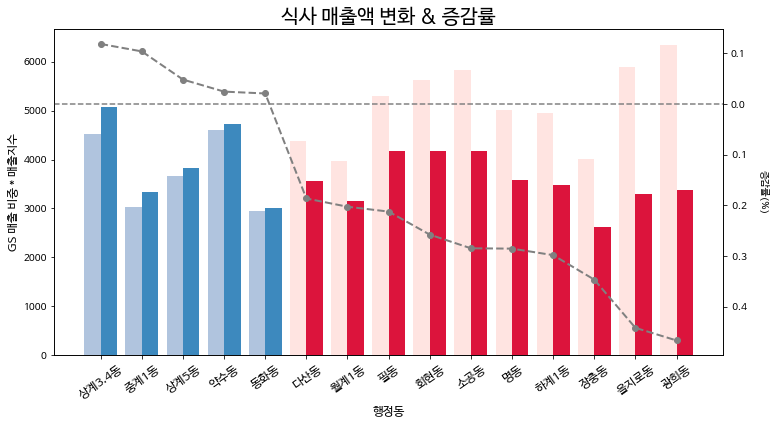

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:3936: PerformanceWarning:

dropping on a non-lexsorted multi-index without a level parameter may impact performance.

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 8722 missing from current font.

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning:

Glyph 8722 missing from current font.



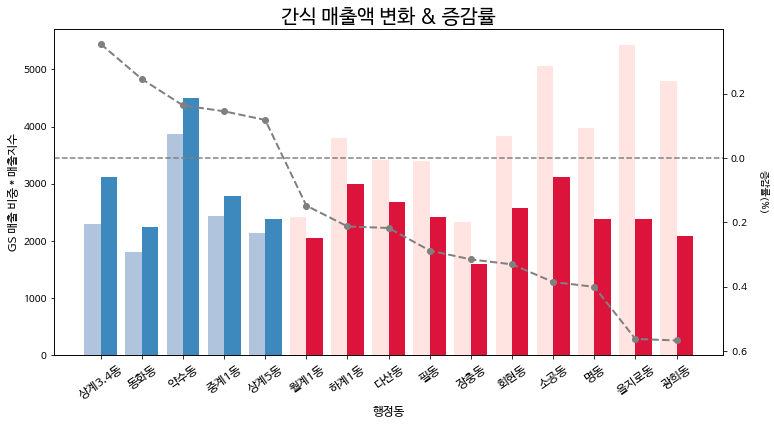

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:3936: PerformanceWarning:

dropping on a non-lexsorted multi-index without a level parameter may impact performance.

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 8722 missing from current font.

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning:

Glyph 8722 missing from current font.



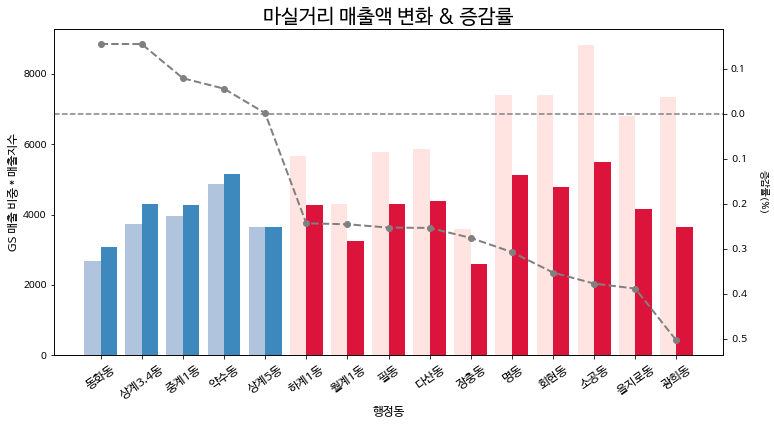

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:3936: PerformanceWarning:

dropping on a non-lexsorted multi-index without a level parameter may impact performance.

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 8722 missing from current font.

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning:

Glyph 8722 missing from current font.



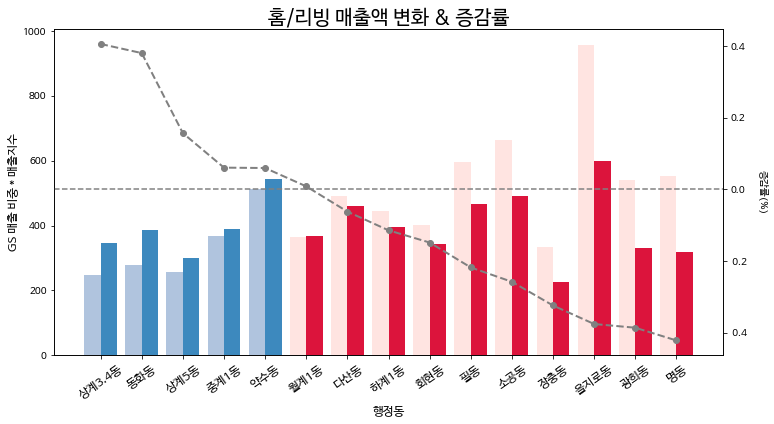

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:3936: PerformanceWarning:

dropping on a non-lexsorted multi-index without a level parameter may impact performance.

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 8722 missing from current font.

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning:

Glyph 8722 missing from current font.



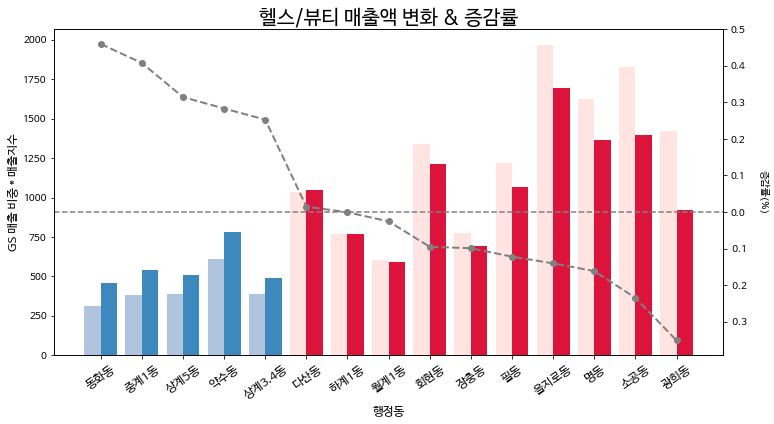

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:3936: PerformanceWarning:

dropping on a non-lexsorted multi-index without a level parameter may impact performance.

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 8722 missing from current font.

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning:

Glyph 8722 missing from current font.



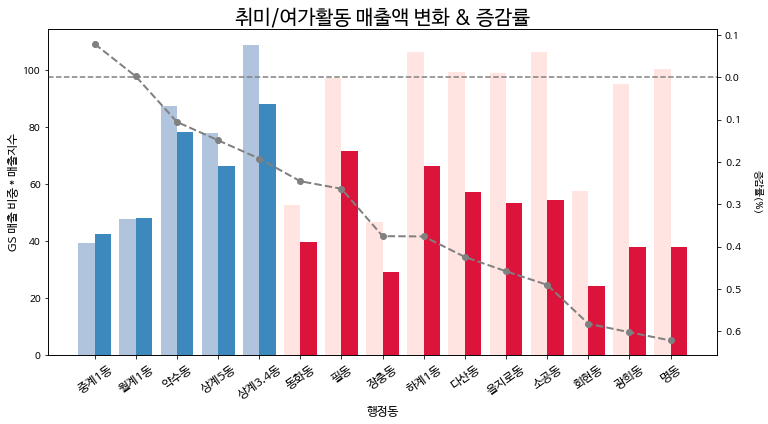

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:3936: PerformanceWarning:

dropping on a non-lexsorted multi-index without a level parameter may impact performance.

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 8722 missing from current font.

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning:

Glyph 8722 missing from current font.



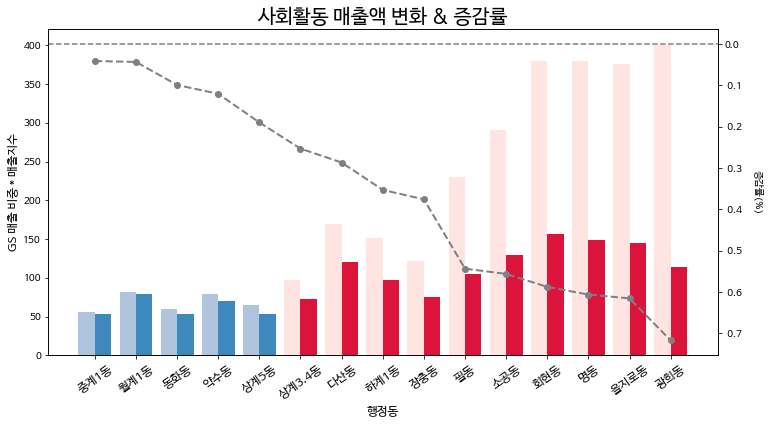

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:3936: PerformanceWarning:

dropping on a non-lexsorted multi-index without a level parameter may impact performance.

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 8722 missing from current font.

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning:

Glyph 8722 missing from current font.



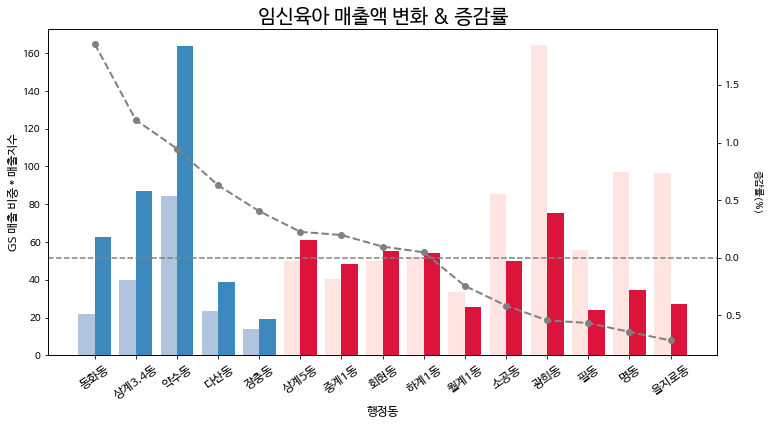

In [ ]:
def gr_cat_plot_sort(cat, gs_a_rank):

  dat = gs_a_rank[['HDONG_NM',cat]].sort_values(by=(cat,'growth'),ascending=False)
  dat_sort_list = dat['HDONG_NM'].tolist()
  dat.index = dat['HDONG_NM']
  dat_g = pd.DataFrame(dat[[(cat,'growth')]].unstack().reset_index(drop=False).rename({0:'growth'},axis=1).drop(['level_0',	'year'],axis=1))
  dat = dat.drop('HDONG_NM',axis=1).drop((cat,'growth'),axis=1).droplevel(0,axis=1).unstack().reset_index(drop=False).rename({0:'매출비중'},axis=1)

  
  plt.figure(figsize = (12,6))  
  new_cat = cat[3:]
  plt.title(new_cat + ' 매출액 변화 & 증감률',fontsize=20)
  plt.bar(dat[dat.year==2019].index-0.2,dat[dat.year==2019].매출비중,width=0.4, color=['lightsteelblue']*5 + ['mistyrose']*15, label='2019')
  plt.bar(dat[dat.year==2019].index+0.2,dat[dat.year==2020].매출비중,width=0.4, color=['#3d89be']*5 + ['crimson']*15,label='2020')
  plt.xticks(np.array(range(15)),dat[dat.year==2019].HDONG_NM.to_list(),fontsize=12,rotation=35)
  # plt.legend(['2019','2020'],ncol=2,loc='upper center')
  plt.xlabel('행정동',size=12)
  plt.ylabel('GS 매출 비중 * 매출지수',size=12)
  ax2 = plt.twinx()  
  ax2.axhline(y=0, xmin=0, xmax=1,color='grey',linestyle='--')
  ax2.plot('HDONG_NM','growth',data = dat_g,
            color='grey',marker='o',linestyle='--',linewidth=2,markerfacecolor='grey')
  ax2.set_ylabel('증감률(%)',rotation=270)
  ax2.yaxis.labelpad = 20
  ax2.tick_params(axis='y', labelcolor='black')  
    
  plt.show()

# 왼쪽 y = 카테고리별 19,20 비중 & 오른쪽 y = 비중 증감률
### 비중 증감률 단순 sub 해도되는거 맞나 확인!
for i in gs_list:
  gr_cat_plot_sort(i,gs_a_rank)